# Побудова моделі


<h2>Мета</h2>

Ознайомитись з різновидами регресійних моделей. Після завершення цієї лабораторної роботи ви зможете:

* Будувати регресійні моделі кількох видів
* Оцінювати якість моделі візуально
* Оцінювати якість моделі за допомогою числових мір, без використання тестової вибірки
* Виконувати прогнозування відгуку, використовуючи побудовану модель

Приблизний час виконання: **60** хвилин


# <h2>Зміст</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3>Завдання для тренування</h3>
<ul>
    <li><a href="#Linear_Regression">Лінійна регресія та множинна лінійна регресія</a></li>
    <li><a href="#Model_Evaluation">Оцінка моделі за допомогою візуалізації</a></li>
    <li><a href="#Polynomial_Regression">Поліноміальна регресія та конвеєри</a></li>
    <li><a href="#Measures">Міри для оцінки моделі</a></li>
    <li><a href="#Prediction">Прогнозування та прийняття рішень</a></li>
</ul>

</div>

<hr>


<p>У цій роботі розробимо кілька моделей, які прогнозуватимуть ціну автомобіля за допомогою змінних чи ознак. Це лише приблизний показник, але він повинен дати нам об’єктивне уявлення про те, скільки має коштувати автомобіль.</p>
<p>Питання, на які хочемо знайти відповідь:
<ul>
    <li>Чи пропонує дилер справедливу ціну? </li>
    <li>Чи правильно я оцінив вартість свого автомобіля? </li>
</ul>
</p>

<p>В аналітиці даних часто використовують <b>Розробку моделі</b>, щоб прогнозувати майбутні спостереження на основі даних, які  вже є. Модель допоможе нам зрозуміти точний зв’язок між різними змінними та те, як ці змінні використовуються для прогнозування результату.</p>


 Імпорт бібліотек:


In [ ]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3-y
#! mamba install numpy=1.21.2-y
#! mamba install sklearn=0.20.1-y

In [ ]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
%pip install sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Завантажте дані та збережіть їх у датафрейм `df`:


In [ ]:
# Якщо використовуєте Google Colaboratory

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/auto1.csv" # коренева папка вашого диску
path = "/content/drive/My Drive/data/auto1.csv" # не коренева папка вашого диску


In [ ]:
# Якщо використовуєте Jupyter Notebook

path = "data/auto1.csv"

In [2]:
# Якщо забули зберегти дані, то скористайтесь цим файлом (This dataset was hosted on IBM Cloud object)

path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<a name="Linear_Regression"></a>
## <h2>Лінійна регресія та множинна лінійна регресія</h2>


<h4>Лінійна регресія (Linear Regression)</h4>



<p>Один із прикладів моделі даних, яку ми будемо використовувати:</p>
<b>Проста лінійна регресія (Simple Linear Regression)</b>

<br>
<p>Проста лінійна регресія — це метод, який допомагає нам зрозуміти зв’язок між двома змінними:</p>
<ul>
    <li>Предиктором/незалежною змінною (X)</li>
    <li>Відгуком/залежною змінною (те, що хочемо прогнозувати)(Y)</li>
</ul>

<p>Результатом лінійної регресії є <b>лінійна функція</b>, яка прогнозує відгук (залежну змінну) як функцію предиктора (незалежної змінної).
</p>



$$
 Y: Response \ Variable\\\\
 X: Predictor \ Variables
$$


 <b>Лінійна функція</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a називають <b>intercept</b> (перетином) лінії регресії, іншими словами: значення Y, коли X дорівнює 0</li>
    <li>b називають <b>slope</b> (нахилом) лінії регресії, іншими словами: значення, на яке змінюється Y, коли X збільшується на 1 одиницю</li>
</ul>


<h4>Завантажимо модулі для лінійної регресії:</h4>


In [6]:
from sklearn.linear_model import LinearRegression

<h4>Створимо об’єкт лінійної регресії:</h4>


In [7]:
lm = LinearRegression()
lm

LinearRegression()

<h4>Як 'highway-mpg' допоможе прогнозувати ціну авто?</h4>


Наприклад, хочемо подивитися, як 'highway-mpg' може допомогти нам прогнозувати ціну автомобіля.
Використовуючи просту лінійну регресію, створимо лінійну функцію з 'highway-mpg' як змінною-предиктором і 'price' як змінною-відгуком.

In [8]:
X = df[['highway-mpg']]
Y = df['price']

Побудуємо лінійну модель з предиктором 'highway-mpg':


In [9]:
lm.fit(X,Y)

LinearRegression()

 Можемо вивести прогноз:


In [10]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<h4>Яке значення має intercept (a)?</h4>


In [11]:
lm.intercept_

np.float64(38423.305858157415)

<h4>Яке значення має slope (b)?</h4>


In [12]:
lm.coef_

array([-821.73337832])

<h3>Яку кінцеву лінійну модель отримуємо?</h3>


Як було зазначено вище, ми повинні отримати кінцеву лінійну модель зі структурою:


$$
Yhat = a + b  X
$$


Підставляючи фактичні значення, маємо:


<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2>Завдання #1a: </h2>

<p>Створіть об’єкт лінійної регресії під назвою "lm1".</p>
</div>


In [13]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
lm1 = LinearRegression()
lm1

LinearRegression()

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
lm1 = LinearRegression()
lm1
```

</details>


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання #1b: </h2>

<p> Навчіть модель, використовуючи 'engine-size' як незалежну змінну та 'price' як залежну змінну.</p>
</div>


In [15]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
X = df[['engine-size']]
Y = df['price']

lm1.fit(X, Y)

LinearRegression()

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
lm1.fit(df[['engine-size']], df[['price']])
lm1
```

</details>



<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2>Завдання #1c:</h2>

<p>Знайдіть коефіцієнти (slope та intercept) моделі.</p>
</div>


<h4>Slope</h4>


In [22]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print(lm1.coef_)

[166.86001569]


<h4>Intercept</h4>


In [23]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print(lm1.intercept_)

-7963.338906281046


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# Slope
lm1.coef_

# Intercept
lm1.intercept_
```

</details>



<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2>Завдання #1d: </h2>

<p>Яке рівняння лінії прогнозу? Ви можете використовувати X та Yhat, або 'engine-size' та 'price'.</p>
</div>


In [25]:
# Напишіть рівняння моделі, виконувати не потрібно
Yhat = lm1.intercept_ + lm1.coef_*X
Yhat[0:5]

,engine-size
0,13728.463134
1,13728.463134
2,17399.383479
3,10224.402804
4,14729.623228


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# using X and Y  
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*engine-size

```

</details>



<h4>Множинна лінійна регресія (Multiple Linear Regression)</h4>


<p>Як передбачити ціну автомобіля за допомогою кількох змінних?</p>

<p>Якщо хочемо використовувати більше змінних у моделі для прогнозування ціни автомобіля, можемо використати <b>множинну лінійну регресію</b>.
Множинна лінійна регресія дуже схожа на просту лінійну регресію, але цей метод використовується для пояснення зв’язку між однією неперервною залежною змінною (відгуком)  та <b>двома або більше</b> незалежними змінними (предикторами).
Більшість регресійних моделей реального світу включають кілька предикторів. Проілюструємо структуру за допомогою чотирьох змінних-предикторів, але ці результати можна узагальнити на будь-яке ціле число:</p>


$$
Y: Response \ Variable\\\\
X_1 :Predictor\ Variable \ 1\\\\
X_2: Predictor\ Variable \ 2\\\\
X_3: Predictor\ Variable \ 3\\\\
X_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\
b_1 :coefficients \ of\ Variable \ 1\\\\
b_2: coefficients \ of\ Variable \ 2\\\\
b_3: coefficients \ of\ Variable \ 3\\\\
b_4: coefficients \ of\ Variable \ 4\\\\
$$


Рівняння задається так:


$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


<p>З попередньої роботи ми знаємо, що іншими хорошими показниками для ціни можуть бути:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Розробимо модель, використовуючи ці ознаки як змінні-предиктори.


In [51]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Будуємо модель за допомогою цих чотирьох змінних.


In [52]:
lm.fit(Z, df['price'])

LinearRegression()

Яке значення має intercept(a)?


In [53]:
lm.intercept_

np.float64(-15806.624626329245)

Яке значення мають коефіцієнти (b1, b2, b3, b4)?


In [54]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

 Яку кінцеву лінійну модель отримуємо?


Як було зазначено вище, ми повинні отримати кінцеву лінійну модель зі структурою:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

Підставляючи фактичні значення, маємо:


<b>Price</b> = -15806.624626329198 + 53.49574423 x <b>horsepower</b> + 4.70770099 x <b>curb-weight</b> + 81.53026382 x <b>engine-size</b> + 36.05748882 x <b>highway-mpg</b>


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #2a: </h2>
    
<p>Створіть та навчіть модель множинної лінійної регресії "lm2" з відгуком 'price' та предикторами 'normalized-losses' і  'highway-mpg'.</p>
</div>


In [50]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

lm2 = LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression()

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])


```

</details>



<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2>Завдання  #2b: </h2>
    
<p>Знайдіть коефіцієнти моделі.</p>
</div>


In [37]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print(lm2.coef_)

[   1.49789586 -820.45434016]


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
lm2.coef_

```

</details>



<a name="Model_Evaluation"></a>
## <h2>Оцінка моделі за допомогою візуалізації</h2>


Тепер, коли побудовано кілька моделей, як їх оцінити та вибрати найкращу? Один зі способів зробити це — за допомогою візуалізації.

Імпортуйте пакет для візуалізації, seaborn:


In [39]:
# import the visualization package: seaborn
# %pip install seaborn
import seaborn as sns
%matplotlib inline

<h3>Графік регресії</h3>


<p>Для простої лінійної регресії чудовим способом візуалізації відповідності моделі є використання <b>графіків регресії</b>.</p>

<p>Цей графік показуватиме комбінацію розсіяних точок даних (<b>діаграма розсіювання, scatterplot</b>) та підігнану лінію <b>лінійної регресії</b>, що проходить через дані. Це дасть нам обґрунтовану оцінку зв’язку між двома змінними, силу кореляції, а також напрямок зв’язку (позитивна чи негативна кореляція).</p>

Візуалізуємо 'highway-mpg' як потенційний предиктор зміни ціни:

(0.0, 48179.91295986577)

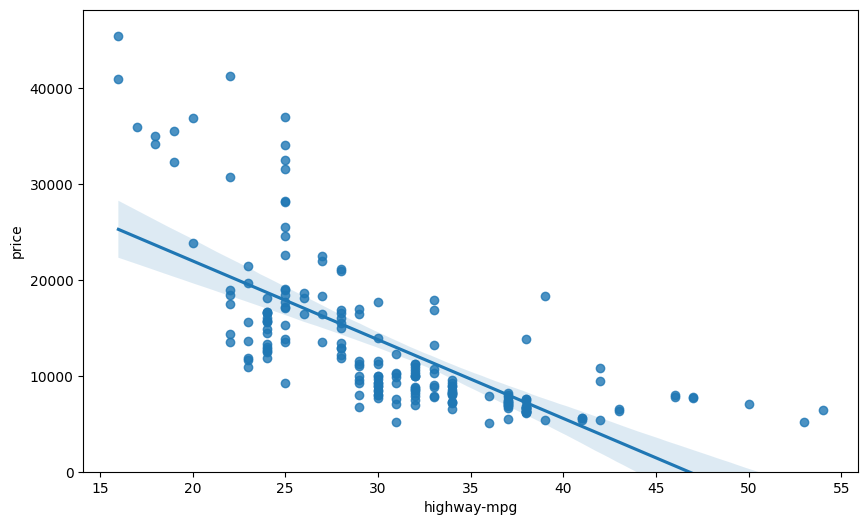

In [42]:
width = 10
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

<p>На цьому графіку бачимо, що ціна негативно корелює з 'highway-mpg', оскільки нахил регресії є негативним.

Дивлячись на графік регресії, слід звертати увагу те, наскільки розкидані точки даних навколо лінії регресії. Це дасть гарне уявлення про дисперсію даних і про те, чи буде лінійна модель найкращою. Якщо дані надто далеко від лінії, ця лінійна модель може бути не найкращою моделлю для цих даних.

Порівняємо цей графік із графіком регресії 'peak-rpm'.</p>


(0.0, 47414.1)

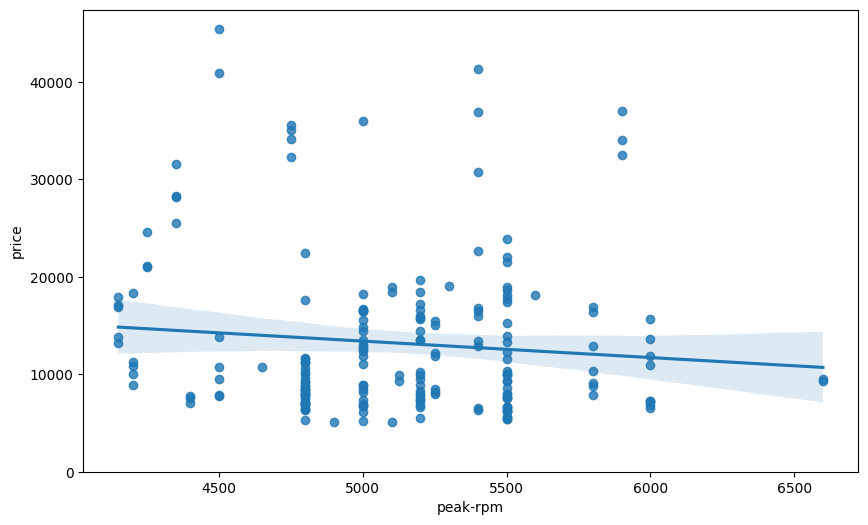

In [43]:
plt.figure(figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

<p>Порівнюючи графік регресії 'peak-rpm' і 'highway-mpg' бачимо, що точки для 'highway-mpg' знаходяться набагато ближче до згенерованої лінії та в середньому зменшуються. Точки для 'peak-rpm' мають більший розкид навколо передбаченої лінії, і набагато важче визначити, зменшується чи збільшується 'price' зі збільшенням 'peak-rpm'.</p>

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2>Завдання #3:</h2>
    
<p>Враховуючи наведені вище графіки регресії скажіть, 'peak-rpm' чи 'highway-mpg' більше корелюють із 'price'?     
<p></p>Використайте метод ".corr()", щоб перевірити свою відповідь.</p>
</div>


In [44]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# Змінна 'highway-mpg' має сильнішу кореляцію з 'price', вона дорівнює приблизно -0.704692,  
# тоді як у 'peak-rpm' приблизно -0.101616. Ви можете перевірити це за допомогою такої команди:

df[['peak-rpm','highway-mpg','price']].corr()

```

</details>



<h3>Діаграма залишків</h3>

<p>Хороший спосіб візуалізації дисперсії даних — використання діаграми залишків.</p>

<p>Що таке <b>залишок</b>? Різниця між спостережуваним значенням (y) і прогнозованим значенням (Yhat) називається залишком (e). Коли ми дивимося на графік регресії, залишок – це відстань від точки даних до підігнаної лінії регресії.</p>
<p>То що таке <b>діаграма залишків</b>? Це графік, який показує залишки на вертикальній осі Y і незалежну змінну на горизонтальній осі X.</p>
<p>На що звернути увагу, дивлячись на діаграму залишків? Дивимося на розподіл залишків: якщо точки на діаграмі залишків <b>випадково розподілені навколо осі х</b>, тоді для даних підходить <b>лінійна модель</b>. Чому так? Випадково розподілені залишки означають, що дисперсія стала, і тому лінійна модель добре підходить для цих даних.</p>

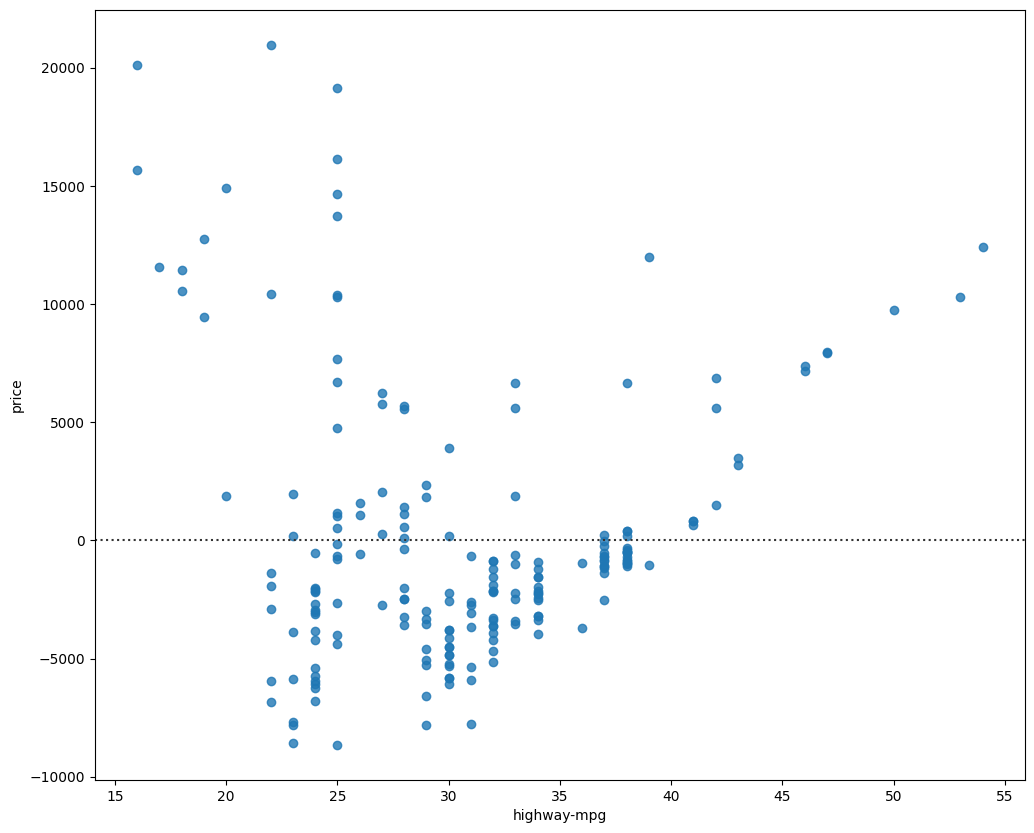

In [45]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

<p>На діаграмі залишків бачимо, що залишки не розподілені випадковим чином навколо осі x; тому, можливо, нелінійна модель більш підходить для цих даних.</p>

<h3>Графік для множинної лінійної регресії</h3>


<p>Як візуалізувати модель для множинної лінійної регресії? Це дещо складніше, оскільки не можемо візуалізувати її за допомогою графіка регресії чи діаграми залишків.</p>

<p>Один із способів перевірити відповідність моделі – переглянути <b>графік розподілу</b>. Можемо переглянути розподіл прогнозних (підігнаних) значень, які є результатом моделі, і порівняти його з розподілом фактичних значень.</p>

Спочатку зробимо прогноз:


In [57]:
Y_hat = lm.predict(Z)

/var/folders/gj/d30kkjdn37n1x7z794t6qtm00000gn/T/ipykernel_11245/3293140834.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
/var/folders/gj/d30kkjdn37n1x7z794t6qtm00000gn/T/ipykernel_11245/3293140834.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147

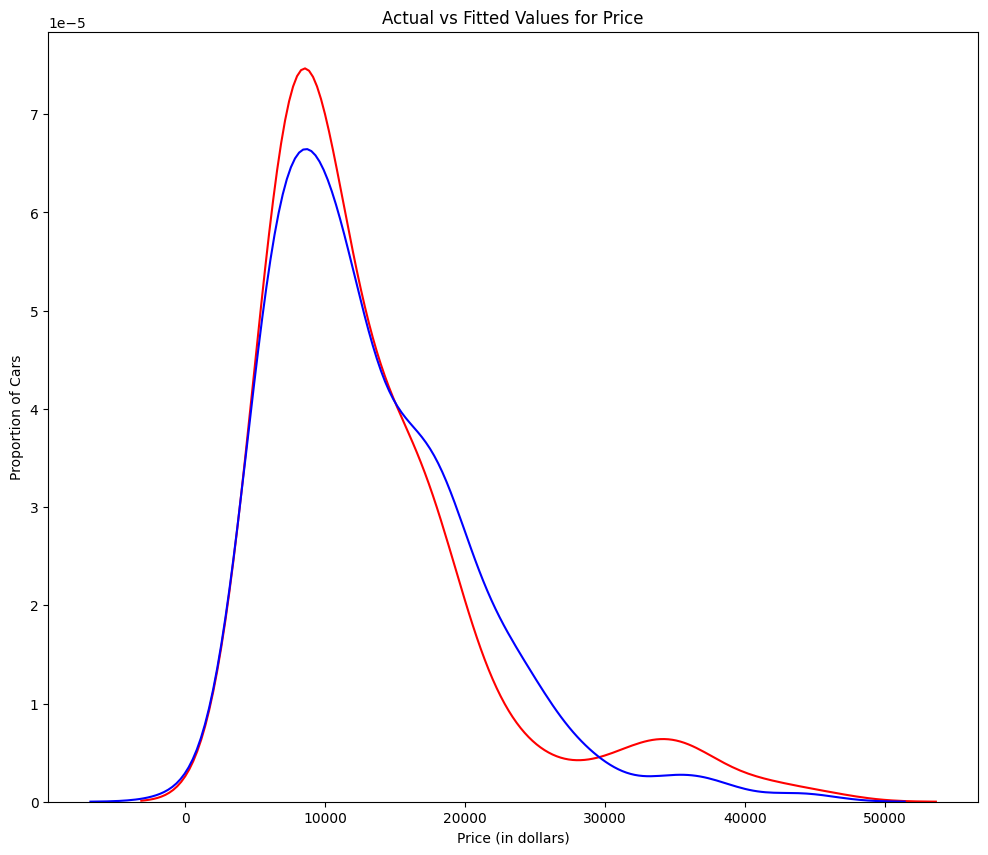

In [60]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

<p>Бачимо, що підігнані значення досить близькі до фактичних значень, оскільки два розподіли трохи накладаються. Проте, безумовно, є місце для вдосконалення.</p>

<a name="Polynomial_Regression"></a>
## <h2>Поліноміальна регресія та конвеєри</h2>


<p><b>Поліноміальна регресія</b> є окремим випадком моделі загальної лінійної регресії або моделей множинної лінійної регресії. Ми отримуємо нелінійні зв’язки, зводячи в квадрат або вносячи доданки вищого порядку для змінних-предикторів.</p>

<p>Існують поліноміальні регресії різних порядків :</p>

<center><b>Квадратична - 2го порядку</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 \\\\
$$


<center><b>Кубічна - 3го порядку</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$


<center><b>Високих порядків</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


<p>Раніше ми бачили, що лінійна модель не забезпечувала найкращого прогнозу при використанні 'highway-mpg' як змінної-предиктора. Подивимося, чи можна замість цього спробувати підібрати поліноміальну модель для даних.</p>

<p>Використаємо таку функцію, щоб побудувати дані:</p>

In [2]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title("Polynomial Fit with Matplotlib for Price ~ Length")
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("Price of Cars")

    plt.show()
    plt.close()

Отримаємо змінні:


In [62]:
x = df['highway-mpg']
y = df['price']

Підберемо поліном за допомогою функції <b>polyfit</b>, а потім скористаємося функцією <b>poly1d</b>, щоб відобразити поліноміальну функцію.

In [3]:
# використовуємо поліном 3-го порядку
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

NameError: name 'np' is not defined

Побудуємо графік функції:


In [1]:
PlotPolly(p, x, y, 'highway-mpg')

NameError: name 'PlotPolly' is not defined

In [ ]:
np.polyfit(x, y, 3)

<p>З графіка бачимо, що ця поліноміальна модель працює краще, ніж лінійна модель. Це пояснюється тим, що згенерована поліноміальна функція "вражає" більше точок даних.</p>

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2>Завдання  #4:</h2>
    
<p>Створіть поліноміальну модель 11-го порядку зі змінними x і y, що задали вище.</p></div>


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


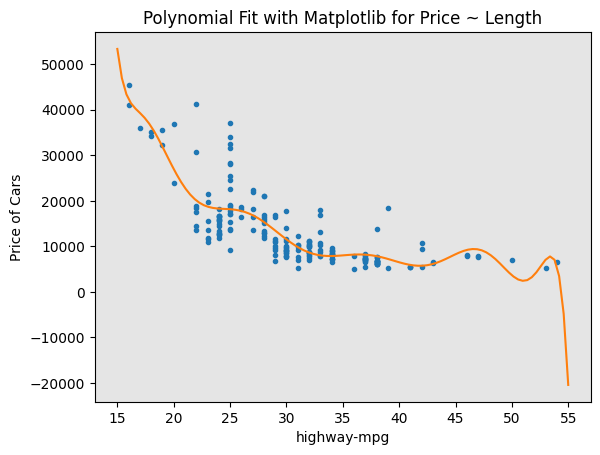

In [66]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
f11 = np.polyfit(x, y, 11)
p11 = np.poly1d(f11)
print(p11)
PlotPolly(p11, x, y, 'highway-mpg')

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# використовуємо поліном 11-го порядку  
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

```

</details>



<p>Аналітичний вираз для функції багатовимірного багаточлена ускладнюється. Наприклад, вираз для полінома другого порядку (ступінь=2) із двома змінними має вигляд:</p>

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


Можемо виконати поліноміальне перетворення на кількох об’єктах. Спочатку ми імпортуємо модуль:


In [67]:
from sklearn.preprocessing import PolynomialFeatures

Створюємо об’єкт <b>PolynomialFeatures</b> ступеня 2:


In [68]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [69]:
Z_pr=pr.fit_transform(Z)

У вихідних даних 201 спостереження і 4 ознаки.


In [70]:
Z.shape

(201, 4)

Після трансформації маємо 201 спостереження і 15 ознак.


In [71]:
Z_pr.shape

(201, 15)

<h2>Конвеєр (Pipeline)</h2>


<p>Конвеєри даних спрощують етапи обробки даних. Використовуємо модуль <b>Pipeline</b> для створення конвеєра. Також використовуємо <b>StandardScaler</b> як крок у нашому конвеєрі.</p>

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Створюємо конвеєр, задаючи список кортежів, що включає назву моделі або оцінювача та відповідний конструктор.


In [73]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Вводимо список як аргумент у конструктор конвеєра:


In [74]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Спершу перетворюємо тип даних Z на тип float, щоб уникнути попереджень про перетворення, які можуть з’являтися в результаті того, що StandardScaler приймає вхідні дані з плаваючою точкою.

Потім можемо нормалізувати дані, виконати перетворення та одночасно підібрати (підігнати) модель.

In [75]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

 Аналогічно можемо нормалізувати дані, виконати перетворення та одночасно створити прогноз.


In [76]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2>Завдання #5:</h2>
    
<p>Створіть конвеєр, який стандартизує дані, а потім створіть прогноз за допомогою моделі лінійної регресії з використанням ознак Z і відгуку y.</p></div>


In [78]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
Input1=[('scale', StandardScaler()), ('model', LinearRegression())]
pipe1=Pipeline(Input1)
pipe1.fit(Z, y)
ypipe1=pipe1.predict(Z)
ypipe1[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

```

</details>



<a name="Measures"></a>
## <h2>Міри для оцінки моделі In-Sample (без тестової вибірки)</h2>


<p>Оцінюючи моделі, ми хочемо не лише візуалізувати результати, але й мати кількісні показники, щоб визначити, наскільки точна модель.</p>
<p>Є два дуже важливі показники, які часто використовуються в статистиці для визначення точності моделі:</p>
<ul>
    <li><b>R^2 / R-squared</b> - коефіцієнт детермінації</li>
    <li><b>Mean Squared Error (MSE)</b> - середня квадратична помилка</li>
</ul>
    
<b>R-squared</b>

<p>R-квадрат, також відомий як коефіцієнт детермінації, є мірою, яка вказує, наскільки близько знаходяться дані до підігнаної лінії регресії. Значення R-квадрата – це відсоток дисперсії змінної-відгуку (y), який пояснюється лінійною моделлю.</p>

<b>Mean Squared Error (MSE)</b>

<p>Середня квадратична помилка вимірює середнє значення квадратів помилок. Тобто різниця між фактичним значенням (y) і розрахунковим значенням (ŷ).</p>

<h3>Модель 1: Simple Linear Regression</h3>


Обчислимо R^2:


In [79]:
# highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


Можна сказати, що ~49.659% варіації ціни пояснюється цією простою лінійною моделлю "highway_mpg_fit".

Обчислимо MSE.


Ми можемо прогнозувати результат, тобто "Yhat", використовуючи метод прогнозу, де X є вхідною змінною:


In [80]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


Імпортуємо функцію <b>mean_squared_error</b> з модуля <b>metrics</b>:


In [81]:
from sklearn.metrics import mean_squared_error

Тепер можемо порівняти прогнозовані результати з фактичними:


In [82]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.025174143


<h3>Модель 2: Multiple Linear Regression</h3>


Обчислимо R^2:


In [83]:
# multi_fit
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


Можемо сказати, що ~80.936 % варіації ціни пояснюється цією множинною лінійною регресією "multi_fit".


Обчислимо MSE.


Робимо прогноз:


In [84]:
Y_predict_multifit = lm.predict(Z)

Порівнюємо прогнозовані результати з фактичними:

In [85]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Модель 3: Polynomial Fit</h3>


Обчислимо R^2.


Імпортуємо функцію <b>r2_score</b> з модуля <b>metrics</b>, оскільки ми використовуємо іншу функцію.


In [86]:
from sklearn.metrics import r2_score

Застосовуємо функцію, щоб отримати значення R^2:


In [87]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906517


Можемо сказати, що ~67.419 % варіації ціни пояснюється цією поліноміальною моделлю.


Також можемо розрахувати MSE:


In [88]:
mean_squared_error(df['price'], p(x))

20474146.42636122

<a name="Prediction"></a>
## <h2>Прогнозування та прийняття рішень</h2>

<h3>Прогнозування</h3>

<p>У попередньому розділі ми навчили модель за допомогою методу <b>fit</b>. Тепер використаємо метод <b>predict</b> для створення прогнозу. Імпортуємо <b>pyplot</b> для малювання; також будемо використовувати деякі функції з numpy.</p>

In [89]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Створюємо новий вхід:


In [90]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Підбираємо (тренуємо) модель:


In [91]:
lm.fit(X, Y)
lm

LinearRegression()

Робимо прогноз:


In [92]:
yhat=lm.predict(new_input)
yhat[0:5]

/Users/saszco/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

Можемо побудувати графік:


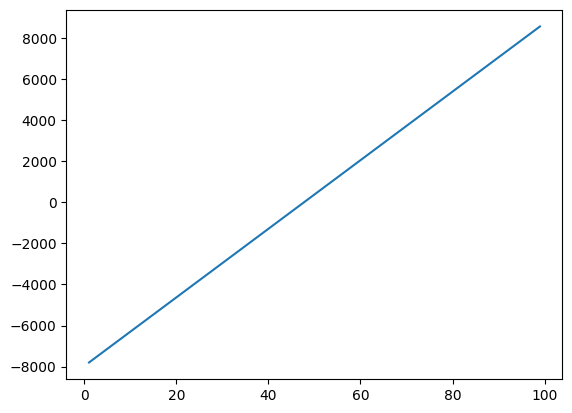

In [93]:
plt.plot(new_input, yhat)
plt.show()

<h3>Прийняття рішень: визначення відповідності моделі</h3>


<p>Тепер, коли ми візуалізували різні моделі та згенерували значення R-квадрат і MSE для побудованих моделей, як визначаємо хорошу модель?
<ul>
    <li><i>Що таке хороше значення R-квадрат?</i></li>
</ul>
</p>

<p>Під час порівняння моделей, <b>модель із вищим значенням R-квадрат краще підходить</b> для даних.<ul>
    <li><i>Що таке хороший MSE?</i></li>
</ul>
</p>

<p>Під час порівняння моделей <b>модель із найменшим значенням MSE краще підходить</b> для даних.</p>

<h4>Розглянемо значення для різних моделей.</h4>
<p>Simple Linear Regression: використовує Highway-mpg як змінну-предиктор для Price.
<ul>
    <li>R-squared: 0.4965911884339175</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: використовує Horsepower, Curb-weight, Engine-size, та Highway-mpg як змінні-предиктори для Price.
<ul>
    <li>R-squared: 0.8093562806577457</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: використовує Highway-mpg як змінну-предиктор для Price.
<ul>
    <li>R-squared: 0.6741946663906513</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>


<p>Зазвичай, чим більше у вас змінних, тим краще ваша модель прогнозує, але це не завжди вірно. Іноді у вас може бути недостатньо даних, ви можете зіткнутися з чисельними проблемами, або багато змінних можуть бути некорисними і навіть діяти як шум. Тому ви завжди повинні перевіряти MSE та R^2.</p>

<p>Для порівняння результатів моделей MLR і SLR, розглянемо комбінацію R-квадрат і MSE, щоб зробити найкращий висновок щодо відповідності моделі.
<ul>
     <li><b>MSE</b>: MSE SLR становить 3.16x10^7, тоді як MLR має MSE 1.2x10^7. MSE MLR набагато менший.</li>
     <li><b>R-квадрат</b>: у цьому випадку ми також бачимо, що існує велика різниця між R-квадратом SLR і R-квадратом MLR. R-квадрат для SLR (~0.497) дуже малий порівняно з R-квадратом для MLR (~0.809).</li>
</ul>
</p>

Цей R-квадрат у поєднанні з MSE показує, що MLR виглядає як краща модель для даних порівняно з SLR.

<h3>Simple Linear Regression (SLR) vs. Polynomial Fit</h3>


<ul>
     <li><b>MSE</b>: бачимо, що Polynomial Fit зменшив MSE, оскільки цей MSE менший, ніж той, що отриманий від SLR.</li>
     <li><b>R-квадрат</b>: R-квадрат для Polynomial Fit більший, ніж R-квадрат для SLR, тож Polynomial Fit також трохи підняла R-квадрат.</li>
</ul>
<p>Оскільки Polynomial Fit призвела до нижчого MSE та більшого R-квадрату, ми можемо зробити висновок, що ця модель була кращою, ніж проста лінійна регресія для прогнозування "price" з "highway-mpg" як змінною-предиктором. </p>

<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>


<ul>
     <li><b>MSE</b>: MSE для MLR менший, ніж MSE для Polynomial Fit.</li>
     <li><b>R-квадрат</b>: R-квадрат для MLR також набагато більший, ніж для Polynomial Fit.</li>
</ul>

<h2>Висновок</h2>


<p>Порівнюючи ці три моделі, робимо висновок, що <b>модель MLR є найкращою моделлю</b> для прогнозування ціни на основі нашого набору даних. Цей результат має сенс, оскільки ми маємо загалом 27 змінних, і ми знаємо, що більше ніж одна з цих змінних є потенційними предикторами кінцевої ціни автомобіля.</p>

*В теоретичній частині роботи використано елементи курсу "Data Analysis with Python" від IBM Corporation, автор
<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01" target="_blank">Joseph Santarcangelo</a>*